In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats

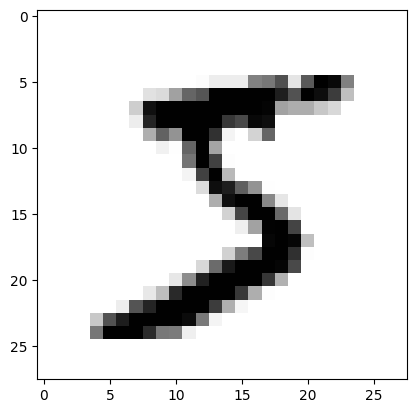

In [2]:
mnist = pickle.load(open('mnist.pkl', 'rb'))
plt.imshow(mnist['data'][0].reshape(28,28), cmap='gray_r') # show first image plt.show()

## Problem 1(a)

In [3]:
a = np.zeros(784)
b = np.empty(784)
b.fill(255)
# print(b)
dist = np.linalg.norm(b - a)
print(dist)

7140.0


## Problem 1(b)

In [4]:
def learn(train_x, train_y):
    return (train_x.astype(float), train_y)

In [5]:
tx = mnist['data'].astype(float)
# print(tx**2)
print(np.sum(tx**2, axis=1))
print(np.sum(tx**2, axis=1) - 2*mnist['testdata'].astype(float).dot(tx.T))

[5940005. 6750341. 3853933. ... 4632710. 3990452. 4137450.]
[[ 1892389.  3178393.  1947685. ...  1980922.  2062998.  1683950.]
 [ 1813429.  2207929.  2517291. ...  1925970.   801488.   978720.]
 [ 3535759.  4605655.  3451415. ...  3575000.  2638584.  2582138.]
 ...
 [  301585.  1974109.   573549. ...  -117086.   311062.  -486460.]
 [ 1438099.  1264083.  2068719. ...  1225128.  -447774.  -259772.]
 [ -748449. -3103019.   837149. ...   138358. -5160696.  -599306.]]


In [6]:
def predict(params, test_x):
    x, y = params
    return y[np.argmin(np.sum(x**2, axis=1) - 2*test_x.dot(x.T), axis=1)]

In [7]:
model = learn(mnist['data'], mnist['labels'])

In [8]:
result1 = predict(model, mnist['testdata'].astype(float))
print(result1)

[7 2 1 ... 4 5 6]


In [9]:
trainx =  mnist['data'].astype(float)
testx =  mnist['testdata'].astype(float)
tmp1 = np.sum(trainx**2, axis=1)
tmp2 = 2*testx.dot(trainx.T)
tmp3 = np.sum(testx**2, axis=1)

In [10]:
print(tmp1.shape)
print(tmp2.shape)
print(tmp3.shape)

(60000,)
(10000, 60000)
(10000,)


In [11]:
def find_dist(params, test_x):
    x, y = params
    return np.min(((np.sum(x**2, axis=1) - 2*test_x.dot(x.T)).T + np.sum(test_x**2, axis=1)).T, axis=1)

In [12]:
find_dist(model, mnist['testdata'].astype(float))

array([ 457766., 1352410.,  103467., ...,  971317., 1725987., 1030011.])

In [13]:
def find_avg(params, test_x):
    x, y = params
    return np.average(np.min(((np.sum(x**2, axis=1) - 2*test_x.dot(x.T)).T + np.sum(test_x**2, axis=1)).T, axis=1))

In [14]:
avg_dist = find_avg(model, mnist['testdata'].astype(float))

In [15]:
print(avg_dist)

1254922.3729


In [16]:
math.sqrt(avg_dist)

1120.2331779143126

### test Problem 1(b)

In [17]:
small_data = pickle.load(open('small_data.pkl', 'rb'))
small_data

{'data': array([[ 78, 116,  97, ..., 107,  67, 153],
        [ 16, 227,  46, ..., 161, 105, 252],
        [118, 119, 162, ..., 231,  96, 252],
        ...,
        [ 16, 125, 198, ..., 110,  85, 253],
        [212,  84,   4, ..., 232, 191,  42],
        [  0, 194, 161, ..., 235, 130, 138]]),
 'testdata': array([[131, 133,   4, ..., 235, 221, 190],
        [192,  34,  13, ...,  94,   3,  72],
        [ 49, 227, 186, ...,  66, 218, 116],
        ...,
        [197,  99, 176, ..., 245, 206, 154],
        [ 33,  20,  81, ...,  83,  12,   6],
        [136,  94,  36, ..., 159,  64,  61]])}

In [18]:
small_data_model = learn(small_data['data'], mnist['labels'])
small_data_avg_dist = find_avg(small_data_model, small_data['testdata'].astype(float))
print(small_data_avg_dist)
print(math.sqrt(small_data_avg_dist))

7571727.5
2751.677215808569


## Problem 1(c)

In [19]:
train_x = mnist['data'].astype(float) # shape (60000,784)
rng = np.random.default_rng()
train_x_noise = rng.integers(255, size=(60000,280))
trainx = np.hstack((train_x,train_x_noise))

In [20]:
test_x = mnist['testdata'].astype(float) # shape (10000,784)
rng = np.random.default_rng()
test_x_noise = rng.integers(255, size=(10000,280))
testx = np.hstack((test_x,test_x_noise))

In [21]:
print(testx.shape, trainx.shape, mnist['labels'].shape)

(10000, 1064) (60000, 1064) (60000,)


In [22]:
result2 = predict((trainx,mnist['labels']), testx)
print(result2)

[7 2 1 ... 4 5 6]


In [23]:
error_count = 0
for i in range(len(result2)):
    if(result2[i] != mnist['testlabels'][i]):
        print(result1[i], result2[i], i, mnist['testlabels'][i])
        error_count+=1

8 2 61 8
9 9 115 4
7 1 175 7
5 5 195 3
4 9 198 4
5 3 219 5
8 8 241 9
4 6 247 4
4 9 250 4
1 1 300 4
2 0 318 2
7 1 320 9
7 7 321 2
5 3 340 5
4 4 358 7
4 9 376 4
7 7 381 3
3 3 412 5
0 5 443 0
8 8 444 2
0 0 445 6
9 9 447 4
9 8 448 9
5 9 460 5
7 7 464 3
3 3 479 9
0 0 495 8
8 4 542 8
8 9 543 8
1 1 551 7
4 9 571 4
8 7 578 3
7 7 583 2
2 7 613 2
3 9 628 3
8 5 641 8
6 4 646 2
2 1 659 2
3 3 684 7
9 9 689 7
8 4 691 8
4 9 707 4
6 6 717 0
3 3 726 7
9 9 740 4
8 3 787 8
5 9 791 5
2 4 830 2
3 3 839 8
5 3 844 8
9 9 881 4
7 7 924 2
5 5 938 3
3 5 944 3
9 9 947 8
4 4 951 5
5 5 957 3
6 0 965 6
2 0 995 2
5 5 1014 6
8 3 1026 8
4 4 1039 7
4 4 1068 8
3 3 1082 5
6 6 1089 5
5 5 1107 9
6 6 1112 4
2 1 1138 2
7 9 1173 7
4 6 1178 4
4 4 1192 9
2 2 1226 7
9 3 1228 9
4 4 1232 9
8 3 1234 8
9 9 1242 4
5 5 1247 9
1 1 1260 7
7 7 1299 5
3 3 1319 8
5 6 1325 8
0 3 1364 8
5 6 1378 5
8 2 1394 8
9 9 1422 4
4 4 1425 8
1 1 1465 4
1 1 1500 7
9 9 1522 7
8 5 1523 8
7 7 1530 8
5 5 1559 9
7 7 1681 3
8 5 1686 8
7 7 1695 9
3 3 1709 9
7 1 

In [24]:
print(error_count)
print(len(mnist['testdata']))
test_error_rate = error_count/len(mnist['testdata'])
test_error_rate

383
10000


0.0383

## Problem 1(d)

In [25]:
# def knn_predict(params, test_x):
#     x, y = params
#     print(np.bincount(y))
#     print(y[np.bincount(y)])
#     # return np.bincount(y).argmax()
#     return y[np.bincount(y).argmax()]

In [26]:
def knn_predict(params, test_x):
    x, y = params
    unique, counts = np.unique(y, return_counts=True)
    print(dict(zip(unique, counts)))

In [27]:
knn_predict(model, mnist['data'].astype(float))

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [28]:
error_count = 0
for i in range(len(mnist['data'])):
    if(mnist['labels'][i] != 1):
        error_count+=1
print(error_count/len(mnist['data']))

0.8876333333333334


## Problem 3

In [29]:
print(np.log(np.exp(1)))
print(np.exp(1))

1.0
2.718281828459045


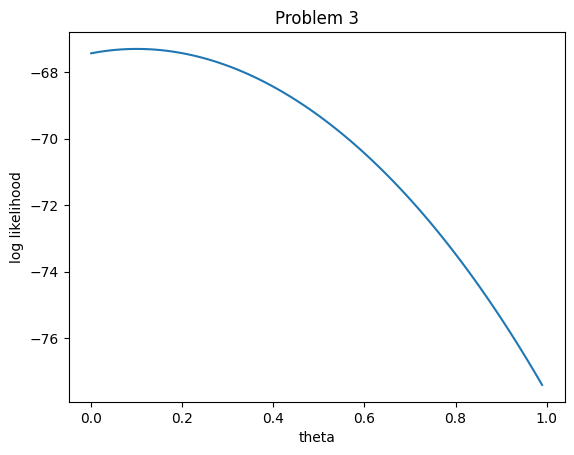

0.1


In [30]:
# x = np.array([0,1])
x = np.arange(0, 1, 0.01)
y = (40*np.log(x/4+3/8))+(60*np.log(5/8-x/4))
plt.title("Problem 3")
plt.xlabel("theta")
plt.ylabel("log likelihood")
plt.plot(x,y) 
plt.show()

print(x[np.argmax(y)])

## Problem 4

In [31]:
mu1, sigma1 = 4.99, 0.31
mu2, sigma2 = 5.93, 0.47
mu3, sigma3 = 6.61, 0.68

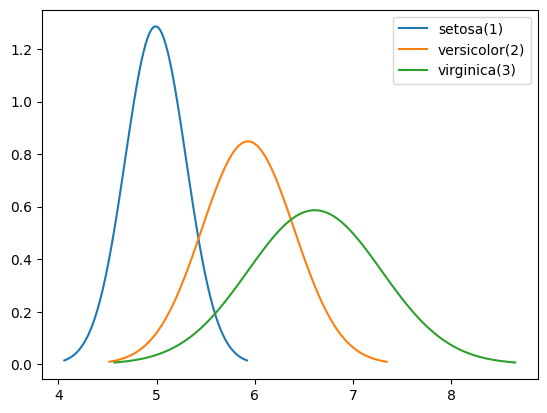

In [32]:
x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
x3 = np.linspace(mu3 - 3*sigma3, mu3 + 3*sigma3, 100)
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma1), label = "setosa(1)")
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma2), label = "versicolor(2)")
plt.plot(x3, stats.norm.pdf(x3, mu3, sigma3), label = "virginica(3)")
plt.legend()
plt.show()

In [33]:
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

In [34]:
x_values = np.linspace(3, 9, 1000)
nd2 = gaussian(x_values, mu2, sigma2)
nd3 = gaussian(x_values, mu3, sigma3)
idx = np.argwhere(np.diff(np.sign(nd2 - nd3))).flatten()
print(x_values[idx])

[4.24324324 6.36336336]


## Problem 5

In [35]:
mu1, sigma1 = 4.99, 0.31
mu2, sigma2 = 5.93, 0.47
mu3, sigma3 = 6.61, 0.68

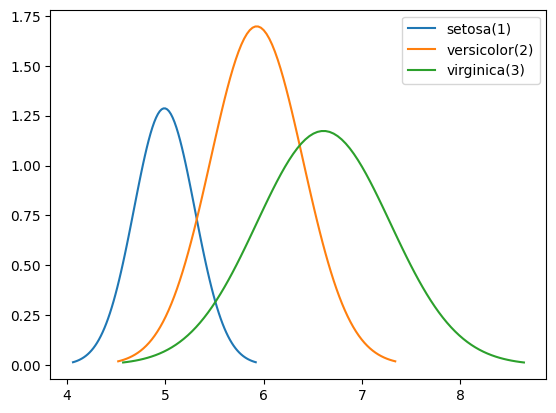

In [44]:
x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
x3 = np.linspace(mu3 - 3*sigma3, mu3 + 3*sigma3, 100)
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma1), label = "setosa(1)")
plt.plot(x2, 2*stats.norm.pdf(x2, mu2, sigma2), label = "versicolor(2)")
plt.plot(x3, 2*stats.norm.pdf(x3, mu3, sigma3), label = "virginica(3)")
plt.legend()
plt.show()

In [40]:
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

In [43]:
x_values = np.linspace(0, 9, 1000)
nd1 = gaussian(x_values, mu1, sigma1)
nd2 = 2*gaussian(x_values, mu2, sigma2)
nd3 = 2*gaussian(x_values, mu3, sigma3)
idx = np.argwhere(np.diff(np.sign(nd1 - (nd2 + nd3)))).flatten()
print(x_values[idx])

[3.63063063 5.27927928]
